<a href="https://colab.research.google.com/github/cpython-projects/E1402/blob/main/session_06_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/E1402/refs/heads/main/real_estate_data.csv')
df.head()

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition
0,0,7312500.0,108.0,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.0,NaN,Kyiv,NaN
1,1,1884375.0,40.4,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.0,2.0,Brovary,81.0
2,2,2922750.0,56.0,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.3,0.0,Kyiv,558.0
3,3,36506250.0,159.0,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0
4,4,5625000.0,100.0,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.0,NaN,Kyiv,121.0


# Grouping Data with `groupby()`

## What is `groupby()`

The `groupby()` method allows you to group data by one or more criteria for further summarization (aggregation).

**General formula:**

```python
df.groupby(key)[fields].aggregating_function()
```

## Usage Scenarios

In [3]:
# Grouping by One Field — One Metric

res = df.groupby('locality_name')['last_price'].mean()
res

,last_price
locality_name,
Borshchahivka,2.106405e+06
Boryspil,1.925962e+06
Boyarka,2.018181e+06
Brovary,1.966631e+06
Bucha,1.952773e+06
Hostomel,1.989404e+06
Irpin,2.023927e+06
Kyiv,4.535160e+06
Vyshneve,1.970079e+06


In [4]:
# Grouping by One Field — Multiple Metrics

res = df.groupby('locality_name')['last_price'].agg(['mean', 'median', 'count'])
res

,mean,median,count
locality_name,,,
Borshchahivka,2.106405e+06,1856250.0,966
Boryspil,1.925962e+06,1771875.0,988
Boyarka,2.018181e+06,1771875.0,1003
Brovary,1.966631e+06,1788750.0,1003
Bucha,1.952773e+06,1771875.0,1005
Hostomel,1.989404e+06,1800000.0,1026
Irpin,2.023927e+06,1828125.0,993
Kyiv,4.535160e+06,3093750.0,15721
Vyshneve,1.970079e+06,1757812.5,994


In [5]:
# Grouping by Multiple Fields

res = df.groupby(['locality_name', 'rooms'])['last_price'].mean()
res

locality_name  rooms
Borshchahivka  0        1.228750e+06
               1        1.604200e+06
               2        2.008376e+06
               3        2.590366e+06
               4        3.818848e+06
                            ...     
Vyshneve       2        2.042682e+06
               3        2.492960e+06
               4        2.757305e+06
               5        5.017500e+06
               6        5.793750e+06
Name: last_price, Length: 72, dtype: float64

In [6]:
# Aggregating Multiple Fields — Multiple Metrics

res = df.groupby('locality_name').agg({
    'last_price': 'mean',
    'total_area': 'median',
    'rooms': 'count'
})
res

,last_price,total_area,rooms
locality_name,,,
Borshchahivka,2.106405e+06,48.50,966
Boryspil,1.925962e+06,45.15,988
Boyarka,2.018181e+06,46.90,1003
Brovary,1.966631e+06,47.00,1003
Bucha,1.952773e+06,45.60,1005
Hostomel,1.989404e+06,46.60,1026
Irpin,2.023927e+06,48.00,993
Kyiv,4.535160e+06,55.00,15721
Vyshneve,1.970079e+06,47.65,994


## `reset_index()`

After `groupby()`, the grouping field (or fields) becomes the index. To turn them back into **regular columns**, you need to use:

```python
.reset_index()
```

Otherwise, plotting or further work will be complicated.

## Task: Calculate:

* average price (`last_price`)
* number of listings (`count`)
* median area (`total_area`) for each city

In [7]:
grouped = df.groupby('locality_name').agg(
    avg_price=('last_price', 'mean'),
    median_area=('total_area', 'median'),
    num_objects=('last_price', 'count')
).reset_index()

grouped

,locality_name,avg_price,median_area,num_objects
0,Borshchahivka,2.106405e+06,48.50,966
1,Boryspil,1.925962e+06,45.15,988
2,Boyarka,2.018181e+06,46.90,1003
3,Brovary,1.966631e+06,47.00,1003
4,Bucha,1.952773e+06,45.60,1005
5,Hostomel,1.989404e+06,46.60,1026
6,Irpin,2.023927e+06,48.00,993
7,Kyiv,4.535160e+06,55.00,15721
8,Vyshneve,1.970079e+06,47.65,994


In [8]:
# Visualization: Top 10 Cities by Number of Listings

import plotly.express as px

top_10 = grouped.sort_values('num_objects', ascending=False).head(10)

fig = px.bar(
    top_10,
    x='locality_name',
    y='num_objects',
    text='avg_price',
    title='🔝 Top 10 Cities by Number of Listings',
    labels={'locality\_name': 'City', 'num\_objects': 'Number of Listings'},
    hover_data={'avg_price': ':.0f', 'median_area': True}
)
fig.update_traces(texttemplate='₴%{text:.0f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Nuances When Working with `groupby`:

| Question                    | Solution or Note                                                                          |
| --------------------------- | ----------------------------------------------------------------------------------------- |
| `NaN` in columns            | Rows with `NaN` in the key are excluded from the result                                   |
| Indexing                    | After `.groupby()`, the result has a hierarchical index — `.reset_index()` is recommended |
| Group name in columns       | You can use the `NamedAgg` syntax                                                         |
| Object type after `groupby` | Can be `SeriesGroupBy` or `DataFrameGroupBy`                                              |


# Aggregations with `.agg()` in Pandas

## Why Aggregations Are Needed

Aggregation is the summarization of numerical values:

| Example Questions                                      | Aggregation |
| ------------------------------------------------------ | ----------- |
| What is the average apartment area in Kyiv?            | `mean()`    |
| How many apartments are listed in Brovary?             | `count()`   |
| What is the maximum price for studios?                 | `max()`     |
| What is the median kitchen size for 3-room apartments? | `median()`  |

---

## `.agg()` Syntax — on One or Multiple Fields

```python
df.agg({'col1': 'mean', 'col2': 'max'})
```

Or on a single column:

```python
df['last_price'].agg(['mean', 'median', 'std'])
```

---

## Combining with `groupby()`

```python
df.groupby('locality_name').agg({
    'last_price': ['mean', 'median', 'min', 'max'],
    'total_area': 'mean'
})
```

The result has a **hierarchical column header (MultiIndex)** → it is recommended to `.reset_index()` and rename columns.

In [9]:
summary = df[['last_price', 'total_area', 'kitchen_area']].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).round(1)

summary


,last_price,total_area,kitchen_area
mean,3679621.2,60.3,10.6
median,2615625.0,52.0,9.1
std,6123945.0,35.7,5.9
min,6856.0,12.0,1.3
max,429187500.0,900.0,112.0
count,23699.0,23699.0,21421.0


In [10]:
# T - transpose

summary = df[['last_price', 'total_area', 'kitchen_area']].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).T.round(1)

summary

,mean,median,std,min,max,count
last_price,3679621.2,2615625.0,6123945.0,6856.0,429187500.0,23699.0
total_area,60.3,52.0,35.7,12.0,900.0,23699.0
kitchen_area,10.6,9.1,5.9,1.3,112.0,21421.0


In [11]:
# Visualization: Boxplot — Apartment Prices by Number of Rooms

fig = px.box(
  df[df['rooms'] <= 5],  # limit large values
  x='rooms',
  y='last_price',
title='Price Distribution by Number of Rooms',
labels={'rooms': 'Rooms', 'last_price': 'Price'},
points='all'  # show all points
)
fig.update_layout(yaxis_title='Price, UAH')
fig.show()


In [12]:
# Visualization: Histogram — Apartment Area

fig = px.histogram(
df[df['total_area'] < 300],  # trim outliers
x='total_area',
nbins=50,
title='Distribution of Total Apartment Area',
labels={'total_area': 'Area (m²)'}
)
fig.show()


## Nuances

| Question                      | Comment                                               |
| ----------------------------- | ----------------------------------------------------- |
| `NaN`                         | Ignored in aggregation functions                      |
| `.agg()` after `groupby()`    | Returns MultiIndex → use `.reset_index()`             |
| `std`, `min`, `max`, `median` | Calculated only for numeric columns                   |
| For bool                      | `mean()` can be used — gives the proportion of `True` |


# Pivot Tables (`pivot_table`)

## What is `pivot_table`

`pivot_table()` is an advanced version of `groupby` that allows you to:

* Create a pivot table across multiple categories
* Place one category in rows, another in columns
* Apply an aggregation function directly
* Excel PivotTable equivalent!

---

## Syntax

```python
pd.pivot_table(
    data=df,
    values='metric',
    index='rows',
    columns='columns',
    aggfunc='function'
)
```


In [13]:
# Example: Average Price by City and Number of Rooms

pivot = pd.pivot_table(
    data=df,
    values='last_price',
    index='locality_name',
    columns='rooms',
    aggfunc='mean'
)
pivot

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
locality_name,,,,,,,,,,,,,,,,,
Borshchahivka,1.228750e+06,1.604200e+06,2.008376e+06,2.590366e+06,3.818848e+06,5.141250e+06,1.968750e+07,1.403438e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boryspil,1.229414e+06,1.629399e+06,1.861518e+06,2.555003e+06,2.951120e+06,3.585938e+06,4.781250e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boyarka,1.195734e+06,1.555137e+06,2.009495e+06,2.579359e+06,4.238156e+06,4.818750e+06,NaN,NaN,2.075625e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brovary,1.256538e+06,1.571792e+06,1.905716e+06,2.597226e+06,3.145994e+06,3.973125e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bucha,1.422614e+06,1.561196e+06,1.924275e+06,2.484768e+06,3.741609e+06,3.681562e+06,7.875000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hostomel,1.220274e+06,1.601997e+06,1.914294e+06,2.617578e+06,4.160419e+06,3.643393e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Irpin,1.381781e+06,1.596621e+06,2.029825e+06,2.509254e+06,3.726581e+06,3.116170e+06,1.141605e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kyiv,2.346998e+06,2.520139e+06,3.802458e+06,5.440218e+06,8.426145e+06,1.448799e+07,1.835869e+07,2.947534e+07,2.893244e+07,1.921070e+07,14718750.0,14203125.0,236250000.0,15091594.0,36562500.0,16031250.0,18140625.0
Vyshneve,1.423406e+06,1.536007e+06,2.042682e+06,2.492960e+06,2.757305e+06,5.017500e+06,5.793750e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Visualization: Heatmap of Pivot Table

import plotly.express as px

fig = px.imshow(
pivot,
labels=dict(x="Number of Rooms", y="City", color="Average Price"),
title="Average Apartment Prices by City and Number of Rooms",
aspect="auto"
)
fig.update_xaxes(type='category')
fig.show()

## Additional Parameters

| Parameter                    | Description              |
| ---------------------------- | ------------------------ |
| `fill_value`                 | value to fill `NaN`      |
| `margins=True`               | add totals               |
| `aggfunc=['mean', 'median']` | apply multiple functions |


# Frequency Tables — `pd.crosstab()`


## What is `crosstab`

`pd.crosstab()` is a way to count the **number of occurrences** for combinations of categorical variables.

## Syntax

```python
pd.crosstab(index=df['rows'], columns=df['columns'])
```


In [15]:
# Example: Number of Apartments That Are Studios or Not by City

cross = pd.crosstab(df['locality_name'], df['studio'])
cross

studio,False,True
locality_name,,
Borshchahivka,960,6
Boryspil,983,5
Boyarka,994,9
Brovary,995,8
Bucha,994,11
Hostomel,1014,12
Irpin,988,5
Kyiv,15635,86
Vyshneve,987,7


In [16]:
# Example: Studios × Open Plan


pd.crosstab(df['studio'], df['is_apartment'])

is_apartment,False,True
studio,,
False,2710,50
True,15,0


## Nuances

| Question                         | Comment                                 |
| -------------------------------- | --------------------------------------- |
| `NaN` in categories              | ignored                                 |
| `normalize='index'`              | shows **proportions** instead of counts |
| Can add `values=` and `aggfunc=` | similar to `pivot_table`                |


In [17]:
# Proportions of Apartment Types (Number of Rooms) in Each City


pd.crosstab(df['locality_name'], df['rooms'], normalize='index')

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
locality_name,,,,,,,,,,,,,,,,,
Borshchahivka,0.009317,0.374741,0.338509,0.236025,0.033126,0.005176,0.001035,0.002070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Boryspil,0.008097,0.402834,0.373482,0.189271,0.023279,0.002024,0.001012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Boyarka,0.012961,0.409771,0.330010,0.219342,0.023928,0.002991,0.000000,0.000000,0.000997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Brovary,0.012961,0.381854,0.358923,0.202393,0.040877,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bucha,0.010945,0.403980,0.343284,0.208955,0.027861,0.003980,0.000995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hostomel,0.016569,0.387914,0.352827,0.216374,0.019493,0.006823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Irpin,0.006042,0.360524,0.400806,0.200403,0.024169,0.007049,0.001007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kyiv,0.006997,0.314039,0.324788,0.262261,0.061574,0.018510,0.006297,0.003626,0.000700,0.000509,0.000191,0.000127,0.000064,0.000127,0.000064,0.000064,0.000064
Vyshneve,0.010060,0.396378,0.344064,0.223340,0.020121,0.004024,0.002012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
# Average Apartment Area by Locality and Number of Rooms


pd.crosstab(
    index=df['locality_name'],
    columns=df['rooms'],
    values=df['total_area'],
    aggfunc='mean'
)

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
locality_name,,,,,,,,,,,,,,,,,
Borshchahivka,27.377778,36.297541,53.463578,70.368158,96.900000,115.360000,380.000000,287.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boryspil,25.657500,36.911809,51.966802,71.817326,84.986957,135.000000,128.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boyarka,24.115385,36.191776,53.485650,70.926136,100.662500,116.833333,NaN,NaN,347.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brovary,25.508462,36.670522,51.950500,73.245961,88.427317,133.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bucha,26.032727,36.221527,51.699855,69.743143,91.646071,118.250000,320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hostomel,25.224706,37.252915,53.116713,70.851306,101.716000,109.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Irpin,28.338333,36.821397,52.891181,73.133568,96.645833,118.328571,192.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kyiv,32.059636,38.312064,57.517372,80.440825,110.912056,166.755292,200.664141,264.538596,251.209091,305.975,259.566667,188.9,900.0,304.2,590.0,270.0,374.6
Vyshneve,25.957000,36.332716,54.462135,70.228198,80.050000,112.600000,137.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Total Price (`last_price`) by Apartment Type (Studio, Non-Studio) and Open Plan Availability


pd.crosstab(
    index=df['studio'],
    columns=df['is_apartment'],
    values=df['last_price'],
    aggfunc='sum'
)


is_apartment,False,True
studio,,
False,9.975303e+09,363493144.0
True,2.204480e+07,NaN


# `resample()` — Aggregation by Dates

## What is `resample`

`resample()` is the time-based equivalent of `groupby()` that works with a `datetime` column.

Requirements:

* have a column of type `datetime64[ns]`
* set it as the **index**

---

## Syntax:

```python
df.resample('period')['metric'].agg(function)
```

| `'D'` | day     |
| ----- | ------- |
| `'W'` | week    |
| `'M'` | month   |
| `'Q'` | quarter |
| `'Y'` | year    |


In [20]:
# Data Preparation


df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df_time = df.set_index('first_day_exposition').sort_index()

In [21]:
# Example: Average Apartment Prices by Month


monthly_price = df_time.resample('M')['last_price'].mean().reset_index()

In [22]:
# Visualization: Average Price Trend by Month


fig = px.line(
    monthly_price,
    x='first_day_exposition',
    y='last_price',
title='Average Apartment Price Trend by Month',
labels={'first_day_exposition': 'Date', 'last_price': 'Average Price'}

)
fig.update_traces(mode='lines+markers')
fig.show()


In [23]:
# Number of Listings by Week


weekly_counts = df_time.resample('W')['last_price'].count().reset_index()
weekly_counts

,first_day_exposition,last_price
0,2021-01-24,1
1,2021-01-31,1
2,2021-02-07,0
3,2021-02-14,1
4,2021-02-21,0
...,...,...
202,2024-12-08,134
203,2024-12-15,108
204,2024-12-22,84
205,2024-12-29,67


In [24]:
# Visualization: Number of Listings by Week


fig = px.bar(
    weekly_counts,
    x='first_day_exposition',
    y='last_price',
title='Number of New Listings by Week',
labels={'last_price': 'Count', 'first_day_exposition': 'Week'}
)
fig.show()


## Why Analysts Use `resample`

| What We Learn                          | How It’s Useful                    |
| -------------------------------------- | ---------------------------------- |
| Market seasonality                     | compare prices by month/year       |
| User activity                          | by number of listings              |
| Event impact analysis (inflation, war) | trends by quarter                  |
| Marketing                              | when interest in real estate rises |


## Nuances

| Problem               | Solution                          |
| --------------------- | --------------------------------- |
| Index is not datetime | `.set_index('datetime')`          |
| Missing periods       | Automatically filled with `NaN`   |
| Jagged chart          | Use `'M'`, `'Q'` instead of `'D'` |
| Large values          | Trim outliers before plotting     |


# `pd.cut()` — групування числових значень у категорії

## What is `cut`

`cut()` splits a numerical column into **intervals (binning)**. For example, you can create apartment categories:

* up to 40 m² → “small”
* 40–80 m² → “medium”
* over 80 m² → “large”

It’s useful for:

* **distribution analysis** (histograms, pie charts)
* **comparing average prices between groups**
* **creating segments**

---

## Syntax

```python
pd.cut(Series, bins, labels=..., include_lowest=True)
```

| Parameter        | Description                              |
| ---------------- | ---------------------------------------- |
| `bins`           | number of bins or list of boundaries     |
| `labels`         | names of the categories                  |
| `include_lowest` | include the lower bound in the first bin |


In [25]:
# Example: Splitting Apartments by Area

df['area_group'] = pd.cut(
    df['total_area'],
    bins=[0, 40, 80, df['total_area'].max()],
    labels=['Small', 'Medium', 'Large'],
    include_lowest=True
)


df['area_group'].value_counts()

,count
area_group,
Medium,13912
Small,6042
Large,3745


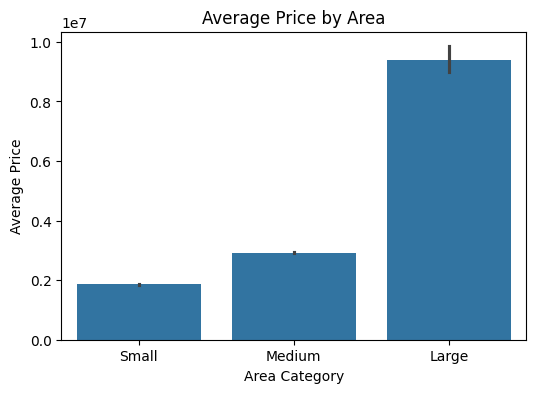

In [26]:
# Visualization: Average Price by Apartment Size

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='area_group', y='last_price')
plt.title('Average Price by Area')
plt.xlabel('Area Category')
plt.ylabel('Average Price')
plt.show()


In [27]:
# Example: Splitting Prices into Groups

df['price_group'] = pd.cut(
    df['last_price'],
    bins=[0, 1_000_000, 3_000_000, 6_000_000, df['last_price'].max()],
    labels=['cheap', 'medium', 'expensive', 'luxury'],
    include_lowest=True
)

# Analysis of Average Area in Each Price Category
df.groupby('price_group')['total_area'].mean()

,total_area
price_group,
cheap,41.736891
medium,45.277508
expensive,68.456639
luxury,127.389839


In [28]:
# Alternative: `qcut()` — Automatic Quantile Binning
# Useful when we want the same number of observations in each group, rather than equal interval widths.

df['price_quantile'] = pd.qcut(df['last_price'], q=4, labels=['Q1','Q2','Q3','Q4'])

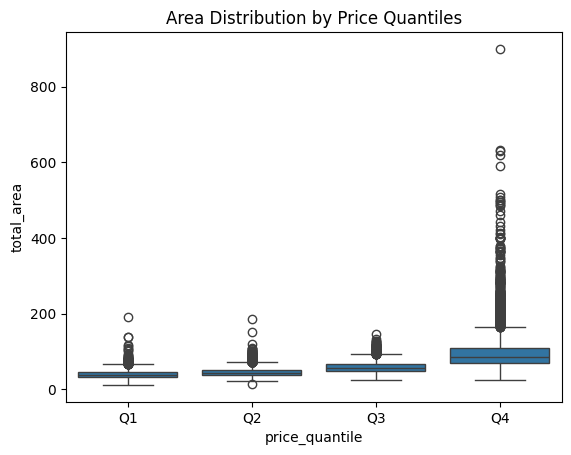

In [29]:
# Visualization: Area Distribution by Price Quantiles

sns.boxplot(data=df, x='price_quantile', y='total_area')
plt.title('Area Distribution by Price Quantiles')
plt.show()

## Why Analysts Use `cut` and `qcut`

| Task                                | Solution                       |
| ----------------------------------- | ------------------------------ |
| Creating segments                   | `cut` or `qcut`                |
| Cohort analysis (generation, price) | `cut` by date or price         |
| Simplifying numerical features      | categorization                 |
| Visualization (pie, bar, boxplot)   | categories are more convenient |

---

## Common Mistakes

| Problem                            | Solution                                 |
| ---------------------------------- | ---------------------------------------- |
| Value on the boundary not included | `include_lowest=True`                    |
| Incorrect categories               | set `labels` manually or check them      |
| Too many unique values for `cut`   | use `qcut` instead of `cut`              |
| Uneven categories                  | manually set `bins` if control is needed |
